<a href="https://colab.research.google.com/github/BensonHermes/2021_1101_Data_Structure/blob/main/%5BDS%5D108307041_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import timeit
from random import randint
import numpy as np

In [2]:
import sys
print(sys.getrecursionlimit())
sys.setrecursionlimit(5000)
print(sys.getrecursionlimit())

1000
5000


In [15]:
header = ["Merge_Sort","Lomuto","Hoare","Dutch_Flag","Heap"]
df = pd.DataFrame(columns=header)
df

,Merge_Sort,Lomuto,Hoare,Dutch_Flag,Heap


In [ ]:
# Python program for implementation of MergeSort
def mergeSort(arr):
	if len(arr) > 1:

		# Finding the mid of the array
		mid = len(arr)//2

		# Dividing the array elements
		L = arr[:mid]

		# into 2 halves
		R = arr[mid:]

		# Sorting the first half
		mergeSort(L)

		# Sorting the second half
		mergeSort(R)

		i = j = k = 0

		# Copy data to temp arrays L[] and R[]
		while i < len(L) and j < len(R):
			if L[i] < R[j]:
				arr[k] = L[i]
				i += 1
			else:
				arr[k] = R[j]
				j += 1
			k += 1

		# Checking if any element was left
		while i < len(L):
			arr[k] = L[i]
			i += 1
			k += 1

		while j < len(R):
			arr[k] = R[j]
			j += 1
			k += 1

In [ ]:
result_list=[]
for k in range(10,31):
  time=0
  result=0
  for i in range(10):
    array = [randint(0, 1000) for i in range(2**k)]
    time += timeit.timeit(stmt='mergeSort(array)', setup='from __main__ import mergeSort, array', number=1)
  result=time/10
  print(result)
  result_list.append(result)
df["Merge_Sort"]=result_list

0.005029639799988672
0.010691269200015086
0.022907864899991637
0.05086782989999392
0.1079971541999953
0.2328444729000239
0.49811755549998227
1.0691694923
2.2829705298000134
4.860629851800025
10.325972453700036
21.863124481199975
46.44280343359994
97.30483770510004
204.28025662610003
430.3623637935001
903.2052956393005


In [6]:
# Python program for implementation of heap Sort

# To heapify subtree rooted at index i.
# n is size of heap
def heapify(arr, n, i):
	largest = i # Initialize largest as root
	l = 2 * i + 1	 # left = 2*i + 1
	r = 2 * i + 2	 # right = 2*i + 2

	# See if left child of root exists and is
	# greater than root
	if l < n and arr[i] < arr[l]:
		largest = l

	# See if right child of root exists and is
	# greater than root
	if r < n and arr[largest] < arr[r]:
		largest = r

	# Change root, if needed
	if largest != i:
		arr[i],arr[largest] = arr[largest],arr[i] # swap

		# Heapify the root.
		heapify(arr, n, largest)

# The main function to sort an array of given size
def heapSort(arr):
	n = len(arr)

	# Build a maxheap.
	# Since last parent will be at ((n//2)-1) we can start at that location.
	for i in range(n // 2 - 1, -1, -1):
		heapify(arr, n, i)

	# One by one extract elements
	for i in range(n-1, 0, -1):
		arr[i], arr[0] = arr[0], arr[i] # swap
		heapify(arr, i, 0)


In [7]:
result_list=[]
for k in range(10,31):
  time=0
  result=0
  for i in range(10):
    array = [randint(0, 1000) for i in range(2**k)]
    time += timeit.timeit(stmt='heapSort(array)', setup='from __main__ import heapSort, array', number=1)
  result=time/10
  print(result)
  result_list.append(result)
df["heapify"]=result_list

0.007091366800068499
0.014462546499817108
0.0320175004997509
0.07070608620006169
0.1492320411000037
0.3153776963998098


KeyboardInterrupt: ignored

Lomuto
https://www.geeksforgeeks.org/hoares-vs-lomuto-partition-scheme-quicksort/

In [3]:
def _partition(array, lo, hi):
    pivot = array[hi]

    i = lo - 1
    for j in range(lo, hi):
        if array[j] < pivot:
            i += 1
            temp = array[i]
            array[i] = array[j]
            array[j] = temp
    temp = array[i + 1]
    array[i + 1] = array[hi]
    array[hi] = temp
    return i + 1

def _quicksort(array, lo, hi):
    if lo < hi:
        p = _partition(array, lo, hi)
        _quicksort(array, lo, p - 1)
        _quicksort(array, p + 1, hi)
    return array

def quickSort(array):
    return _quicksort(array, 0, len(array) - 1)

In [8]:
#@title
''' This function takes last element as pivot, places
the pivot element at its correct position in sorted
    array, and places all smaller (smaller than pivot)
to left of pivot and all greater elements to right
of pivot '''
def partition(arr, low, high):
     
    # pivot
    pivot = arr[high]
     
    # Index of smaller element
    i = (low - 1)
    for j in range(low, high):
         
        # If current element is smaller than or
        # equal to pivot
        if (arr[j] <= pivot):
             
            # increment index of smaller element
            i += 1
            arr[i], arr[j] = arr[j], arr[i]
    arr[i + 1], arr[high] = arr[high], arr[i + 1]
    return (i + 1)
     
''' The main function that implements QuickSort
arr --> Array to be sorted,
low --> Starting index,
high --> Ending index '''
def quickSort(array, low, high):
    if (low < high):
         
        ''' pi is partitioning index, arr[p] is now    
        at right place '''
        pi = partition(array, low, high)
         
        # Separately sort elements before
        # partition and after partition
        quickSort(array, low, pi - 1)
        quickSort(array, pi + 1, high)

In [4]:
result_list=[]
for k in range(10,31):
  time=0
  result=0
  for i in range(10):
    array = [randint(0, 1000) for i in range(2**k)]
    # low=0
    # high=len(array)-1
    time += timeit.timeit(stmt='quickSort(array)', setup='from __main__ import quickSort, array', number=1)
  result=time/10
  print(result)
  result_list.append(result)
  print(result_list)
# df["Lomuto"]=result_list

0.0030111753000014118
[0.0030111753000014118]
0.006237664100001439
[0.0030111753000014118, 0.006237664100001439]
0.012952432000001578
[0.0030111753000014118, 0.006237664100001439, 0.012952432000001578]
0.028244347399997594
[0.0030111753000014118, 0.006237664100001439, 0.012952432000001578, 0.028244347399997594]
0.06649516509999956
[0.0030111753000014118, 0.006237664100001439, 0.012952432000001578, 0.028244347399997594, 0.06649516509999956]
0.1565903966999997
[0.0030111753000014118, 0.006237664100001439, 0.012952432000001578, 0.028244347399997594, 0.06649516509999956, 0.1565903966999997]
0.38100290570000084
[0.0030111753000014118, 0.006237664100001439, 0.012952432000001578, 0.028244347399997594, 0.06649516509999956, 0.1565903966999997, 0.38100290570000084]
1.0965931245000007
[0.0030111753000014118, 0.006237664100001439, 0.012952432000001578, 0.028244347399997594, 0.06649516509999956, 0.1565903966999997, 0.38100290570000084, 1.0965931245000007]
3.6124498024999965
[0.0030111753000014118, 

KeyboardInterrupt: ignored

In [9]:
#@title
result_list=[]
for k in range(10,31):
  time=0
  result=0
  for i in range(10):
    array = [randint(0, 1000) for i in range(2**k)]
    low=0
    high=len(array)-1
    time += timeit.timeit(stmt='quickSort(array, low, high)', setup='from __main__ import quickSort, array, low, high', number=1)
  result=time/10
  print(result)
  result_list.append(result)
  print(result_list)
# df["Lomuto"]=result_list

0.003058866599940302
[0.003058866599940302]
0.006269494200023473
[0.003058866599940302, 0.006269494200023473]
0.014207556000019394
[0.003058866599940302, 0.006269494200023473, 0.014207556000019394]
0.035192153899970435
[0.003058866599940302, 0.006269494200023473, 0.014207556000019394, 0.035192153899970435]
0.08705480149988035
[0.003058866599940302, 0.006269494200023473, 0.014207556000019394, 0.035192153899970435, 0.08705480149988035]
0.2411771913999928
[0.003058866599940302, 0.006269494200023473, 0.014207556000019394, 0.035192153899970435, 0.08705480149988035, 0.2411771913999928]
0.7604093411999656
[0.003058866599940302, 0.006269494200023473, 0.014207556000019394, 0.035192153899970435, 0.08705480149988035, 0.2411771913999928, 0.7604093411999656]
2.6338412343999154
[0.003058866599940302, 0.006269494200023473, 0.014207556000019394, 0.035192153899970435, 0.08705480149988035, 0.2411771913999928, 0.7604093411999656, 2.6338412343999154]
9.795137565999994
[0.003058866599940302, 0.006269494200

KeyboardInterrupt: ignored

Dutch Flag

In [74]:
def swap (A, i, j):
    temp = A[i]
    A[i] = A[j]
    A[j] = temp
 
 
# Partition routine using the Dutch national flag algorithm
def partition(A, start, end):
 
    mid = start
    pivot = A[end]
 
    while mid <= end:
 
        if A[mid] < pivot:
            swap(A, start, mid)
            start += 1
            mid += 1
 
        elif A[mid] > pivot:
            swap(A, mid, end)
            end -= 1
 
        else:
            mid += 1
 
    # `A[start … mid-1]` contains all occurrences of a pivot
    return start - 1, mid
 
 
# 3–way Quicksort routine
def quickSort(array, start, end):
 
    # base condition for 0 or 1 elements
    if start >= end:
        return
 
    # handle 2 elements separately as the Dutch national flag
    # algorithm will work for 3 or more elements
    if start - end == 1:
        if array[start] < array[end]:
            swap(array, start, end)
        return
 
    # rearrange elements across pivot using the Dutch
    # national flag problem algorithm
    x, y = partition(array, start, end)
 
    # recur on sublist containing elements that are less than the pivot
    quicksort(array, start, x)
 
    # recur on sublist containing elements that are more than the pivot
    quicksort(array, y, end)

In [20]:
result_list=[]
for k in range(10,31):
  time=0
  result=0
  for i in range(10):
    array = [randint(0, 1000) for i in range(2**k)]
    start=0
    end=len(array)-1
    time += timeit.timeit(stmt='quickSort(array, start, end)', setup='from __main__ import quickSort, array, start, end', number=1)
  result=time/10
  print(result)
  result_list.append(result)
  print(result_list)

0.005358136100039701
[0.005358136100039701]
0.010589304200038896
[0.005358136100039701, 0.010589304200038896]
0.023109279101117864
[0.005358136100039701, 0.010589304200038896, 0.023109279101117864]
0.0441687237998849
[0.005358136100039701, 0.010589304200038896, 0.023109279101117864, 0.0441687237998849]
0.08507078260045091
[0.005358136100039701, 0.010589304200038896, 0.023109279101117864, 0.0441687237998849, 0.08507078260045091]
0.17006624030072998
[0.005358136100039701, 0.010589304200038896, 0.023109279101117864, 0.0441687237998849, 0.08507078260045091, 0.17006624030072998]
0.3416632082000433
[0.005358136100039701, 0.010589304200038896, 0.023109279101117864, 0.0441687237998849, 0.08507078260045091, 0.17006624030072998, 0.3416632082000433]
0.6802349075001984
[0.005358136100039701, 0.010589304200038896, 0.023109279101117864, 0.0441687237998849, 0.08507078260045091, 0.17006624030072998, 0.3416632082000433, 0.6802349075001984]
1.4292856149000728
[0.005358136100039701, 0.010589304200038896,

KeyboardInterrupt: ignored

Hoare

In [10]:
''' Python implementation of QuickSort using Hoare's
partition scheme. '''

''' This function takes first element as pivot, and places
	all the elements smaller than the pivot on the left side
	and all the elements greater than the pivot on
	the right side. It returns the index of the last element
	on the smaller side '''


def partition(arr, low, high):

	pivot = arr[low]
	i = low - 1
	j = high + 1

	while (True):

		# Find leftmost element greater than
		# or equal to pivot
		i += 1
		while (arr[i] < pivot):
			i += 1

		# Find rightmost element smaller than
		# or equal to pivot
		j -= 1
		while (arr[j] > pivot):
			j -= 1

		# If two pointers met.
		if (i >= j):
			return j

		arr[i], arr[j] = arr[j], arr[i]


''' The main function that implements QuickSort
arr --> Array to be sorted,
low --> Starting index,
high --> Ending index '''


def quickSort(arr, low, high):
	''' pi is partitioning index, arr[p] is now
	at right place '''
	if (low < high):

		pi = partition(arr, low, high)

		# Separately sort elements before
		# partition and after partition
		quickSort(arr, low, pi)
		quickSort(arr, pi + 1, high)


''' Function to pran array '''


def printArray(arr, n):
	for i in range(n):
		print(arr[i], end=" ")
	print()



In [11]:
result_list=[]
for k in range(10,31):
  time=0
  result=0
  for i in range(10):
    array = [randint(0, 1000) for i in range(2**k)]
    low=0
    high=len(array)-1
    time += timeit.timeit(stmt='quickSort(array, low, high)', setup='from __main__ import quickSort, array, low, high', number=1)
  result=time/10
  print(result)
  result_list.append(result)
  print(result_list)

0.0034028848000161815
[0.0034028848000161815]
0.0067432776000714515
[0.0034028848000161815, 0.0067432776000714515]
0.013983582100445346
[0.0034028848000161815, 0.0067432776000714515, 0.013983582100445346]
0.030565582100098253
[0.0034028848000161815, 0.0067432776000714515, 0.013983582100445346, 0.030565582100098253]
0.061336624000068694
[0.0034028848000161815, 0.0067432776000714515, 0.013983582100445346, 0.030565582100098253, 0.061336624000068694]
0.12886616949963353
[0.0034028848000161815, 0.0067432776000714515, 0.013983582100445346, 0.030565582100098253, 0.061336624000068694, 0.12886616949963353]
0.2705431575001057
[0.0034028848000161815, 0.0067432776000714515, 0.013983582100445346, 0.030565582100098253, 0.061336624000068694, 0.12886616949963353, 0.2705431575001057]
0.570750282300105
[0.0034028848000161815, 0.0067432776000714515, 0.013983582100445346, 0.030565582100098253, 0.061336624000068694, 0.12886616949963353, 0.2705431575001057, 0.570750282300105]
1.2160460030998366
[0.003402884

KeyboardInterrupt: ignored

In [6]:
merge_res=[
0.005029639799988672,\
0.010691269200015086,\
0.022907864899991637,\
0.05086782989999392,\
0.1079971541999953,\
0.2328444729000239,\
0.49811755549998227,\
1.0691694923,\
2.2829705298000134,\
4.860629851800025,\
10.325972453700036,\
21.863124481199975,\
46.44280343359994,\
97.30483770510004,\
204.28025662610003,\
430.3623637935001,\
903.2052956393005]

In [7]:
heap_res=[
0.006041630499998974,\
0.012142374600006178,\
0.02900456050000457,\
0.06334951069999875,\
0.1292054301999997,\
0.28620711389999653,\
0.61475616419998,\
1.3330632684000023,\
2.8483637260999783,\
6.23822300249999,\
13.562327140999969,\
28.77430491919997,\
61.44473417400004,\
129.00597580680005]

In [8]:
lomuto_res=\
[0.0030111753000014118, 0.006237664100001439, 0.012952432000001578, 0.028244347399997594, 0.06649516509999956, 0.1565903966999997, 0.38100290570000084, 1.0965931245000007, 3.6124498024999965, 12.640732862799998, 47.4659058254, 198.80813326479998]

In [9]:
hoare_res=\
[0.0034028848000161815, 0.0067432776000714515, 0.013983582100445346, 0.030565582100098253, 0.061336624000068694, 0.12886616949963353, 0.2705431575001057, 0.570750282300105, 1.2160460030998366, 2.6019656828004374, 5.42596873310049, 11.528177000400138, 24.665332343700175, 51.91011286820012, 110.58791862249981]

In [10]:
dutch_flag_res=\
[0.005358136100039701, 0.010589304200038896, 0.023109279101117864, 0.0441687237998849, 0.08507078260045091, 0.17006624030072998, 0.3416632082000433, 0.6802349075001984, 1.4292856149000728, 2.8824060860999454, 5.783922992200314, 11.517579981799646, 24.104295362099947, 48.628169501100274, 105.5831861591003]

In [21]:
while(len(merge_res)!=21):
  merge_res.append(merge_res[len(merge_res)-1]*2)

while(len(heap_res)!=21):
  heap_res.append(heap_res[len(heap_res)-1]*2)

while(len(lomuto_res)!=21):
  lomuto_res.append(lomuto_res[len(lomuto_res)-1]*2)

while(len(hoare_res)!=21):
  hoare_res.append(hoare_res[len(hoare_res)-1]*2)

while(len(dutch_flag_res)!=21):
  dutch_flag_res.append(dutch_flag_res[len(dutch_flag_res)-1]*2)


In [22]:
df['Merge_Sort']=merge_res
df['Lomuto']=lomuto_res
df['Hoare']=hoare_res
df['Dutch_Flag']=dutch_flag_res
df['Heap']=heap_res

In [25]:
index_list=[i for i in range(10,31)]
df

,Merge_Sort,Lomuto,Hoare,Dutch_Flag,Heap
0,0.005030,0.003011,0.003403,0.005358,0.006042
1,0.010691,0.006238,0.006743,0.010589,0.012142
2,0.022908,0.012952,0.013984,0.023109,0.029005
3,0.050868,0.028244,0.030566,0.044169,0.063350
4,0.107997,0.066495,0.061337,0.085071,0.129205
5,0.232844,0.156590,0.128866,0.170066,0.286207
6,0.498118,0.381003,0.270543,0.341663,0.614756
7,1.069169,1.096593,0.570750,0.680235,1.333063
8,2.282971,3.612450,1.216046,1.429286,2.848364
9,4.860630,12.640733,2.601966,2.882406,6.238223


In [47]:
df.index = np.arange(10, len(df)+10)
df['k']=df.index

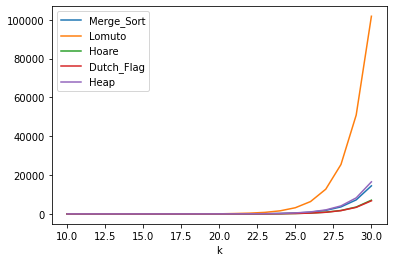

In [50]:
ax =df.plot(x='k')